In [1]:
import numpy as np
from ReplayBuffer import ReplayBuffer
from TD3 import TD3
from Critic import Critic
from Actor import Actor
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler


In [3]:
state_dim = 6
action_dim = 6
max_time = 10

In [3]:
rb = ReplayBuffer(state_dim,action_dim)

In [4]:
# policy = TD3(state_dim,action_dim,max_time,100,100)

In [5]:
act = Actor(state_dim,action_dim,max_time,0.7,5).to('cpu')

In [6]:
for i in range(100):
    state = np.arange(6)
    action = np.arange(6)
    nxt_state = np.arange(6)
    reward = np.random.uniform(1000)
    rb.store(state,action,nxt_state,reward)

In [7]:
state, action, nxt_state, reward = rb.sample(32)

In [8]:
state[0]

array([0., 1., 2., 3., 4., 5.])

In [9]:
act(torch.Tensor(state[0]))

tensor([0.2800, 0.0284, 0.0127, 0.4628, 0.0867, 0.0100],
       grad_fn=<AbsBackward0>)


tensor([[2.8001, 0.0853, 0.1138, 0.0089, 2.3142, 0.4333, 0.0501]],
       grad_fn=<CatBackward0>)

In [7]:
policy.train(rb,10)

In [9]:
action = np.random.rand(19)

In [13]:
T_th = [np.abs(10 * action[0])]
coef = 500 * action[1:]
action = np.concatenate((T_th,coef))

In [14]:
action

array([  3.3242602 , 362.18142335, 238.05038436, 137.94959479,
       305.62622241,  11.29523593, 189.72405898, 164.5146315 ,
       319.40553002, 409.12145127, 226.30330379, 147.13353829,
        41.28369998, 465.91540901, 111.55983097, 199.7546455 ,
        86.58571038, 116.12232831, 317.70933147])

In [44]:
from ReplayBuffer import ReplayBuffer
import os
import matplotlib.pyplot as plt


In [45]:
state_dim = 6
action_dim = 6
max_time = 10

In [49]:
rb = ReplayBuffer(state_dim,action_dim,'../../../../../../ReplayBuffer.csv')

In [50]:
data = rb.dump()

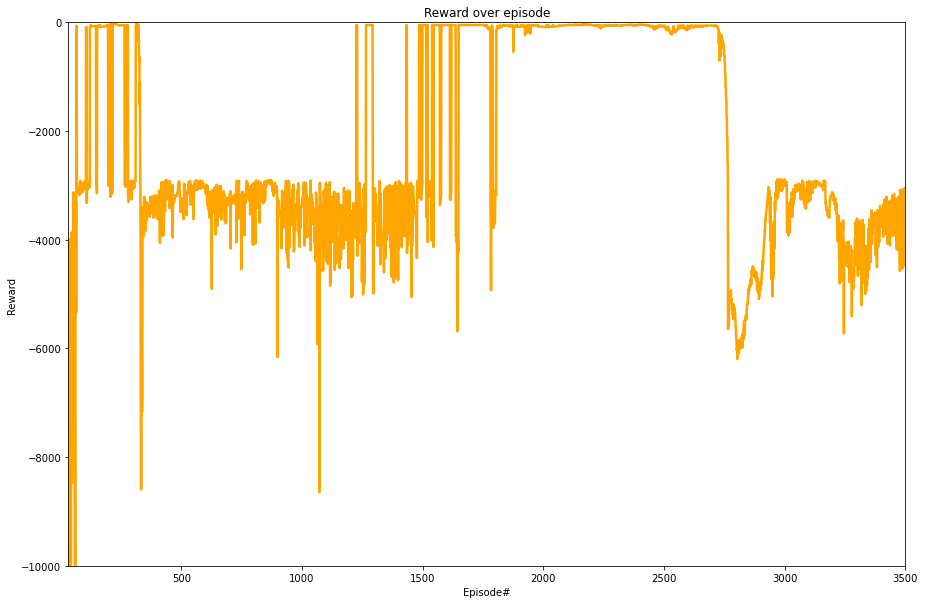

In [51]:
plt.figure(figsize=(15,10))
plt.title("Reward over episode")
plt.xlim((32,len(data['reward'])))
plt.ylim((-10000,0))
plt.xlabel("Episode#")
plt.ylabel("Reward")
plt.plot(data['reward'], color="orange", linewidth=2.5)
plt.savefig('test.jpg')
plt.show()

# Generate jump end position area

In [74]:
import numpy as np
from matplotlib import pyplot as plt

In [75]:
zero = np.array([0,0,0])
targetCoM = np.array([1.5,1.3,0.5])

In [76]:
x,y,z = zip(zero,targetCoM)

In [77]:
# fx,fy,fz = zip(list(max_CoM_f))

In [78]:
def cart2sph(x, y, z):
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    el = np.arctan2(z, hxy)
    az = np.arctan2(y, x)
    return az, el, r

In [79]:
def sph2cart(az, el, r):
    rcos_theta = r * np.cos(el)
    x = rcos_theta * np.cos(az)
    y = rcos_theta * np.sin(az)
    z = r * np.sin(el)
    return x, y, z

In [80]:
az, el, r = cart2sph(targetCoM[0],targetCoM[1],targetCoM[2])

In [81]:
arcx = []
arcy = []
arcz = []
for i in np.arange(0,np.pi/2,0.01):
    x1,y1,z1 = sph2cart(az,i,0.4)
    arcx.append(x1)
    arcy.append(y1)    
    arcz.append(z1)    

In [82]:
a = np.random.rand(10)

In [83]:
el = (np.pi/2)*(a.reshape(-1,1))

In [84]:
r = 0.3*(a.reshape(-1,1))+0.1

In [85]:
state = np.random.rand(10,3)
state

array([[0.65606189, 0.13104571, 0.89029166],
       [0.96032439, 0.2808205 , 0.66803937],
       [0.40791815, 0.24070114, 0.03445158],
       [0.22763933, 0.01723158, 0.29362785],
       [0.23945627, 0.87500339, 0.01435145],
       [0.13840848, 0.25767044, 0.49508562],
       [0.59999541, 0.0391589 , 0.50691885],
       [0.82265675, 0.64709517, 0.66363978],
       [0.3132897 , 0.17976269, 0.45569092],
       [0.21297668, 0.06376436, 0.94861028]])

In [88]:
az, _ , _ = cart2sph(state[:,0].reshape(-1,1),state[:,1].reshape(-1,1),state[:,2].reshape(-1,1))

In [89]:
az = np.full((10,1),az)

In [90]:
rx,ry,rz = sph2cart(az,el,r)

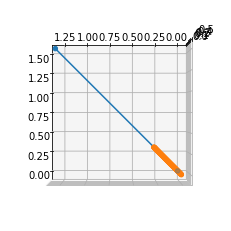

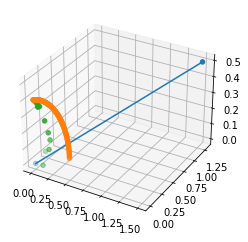

In [91]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(azim=180, elev=90)
ax.scatter(x,y,z)
ax.plot(x,y,z)
ax.scatter(arcx,arcy,arcz)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax.view_init(azim=180, elev=90)
ax.scatter(x,y,z)
ax.plot(x,y,z)
ax.scatter(arcx,arcy,arcz)
ax.scatter(rx,ry,rz)

In [92]:
np.random.uniform(-1,1,10)

array([ 0.81736765, -0.48906118,  0.6949633 , -0.84204968,  0.46444178,
       -0.64507713, -0.15785016, -0.8024703 , -0.69038788, -0.03985923])

In [145]:
import numpy as np
import torch
import torch.nn as nn

In [161]:
class Actor(nn.Module):
    def __init__(self,
                 state_dim,
                 action_dim,
                 max_time,
                 max_velocity,
                 layer_dim=256):

        super(Actor, self).__init__()
        self.action_dim = action_dim
        self.max_time = max_time
        self.max_velocity = max_velocity

        self.actor_model = nn.Sequential(
            nn.Linear(state_dim, layer_dim),
            nn.ReLU(),
            nn.Linear(layer_dim, layer_dim),
            nn.ReLU(),
            nn.Linear(layer_dim, action_dim),
            nn.Tanh()
        )

    def forward(self, state):
        tmp_action = self.actor_model(state)
        action_shape = list(tmp_action.shape)[0]
        action_dim = len(tmp_action.shape)

        if action_dim > 1:
            az, _, _ = cart2sph(state[:,3].reshape(-1,1), state[:,4].reshape(-1,1), state[:,5].reshape(-1,1))
            az = np.full((action_shape,1),az)
            T_th = (self.max_time-0.1)*(torch.abs(tmp_action[:,0]).reshape(-1,1))+0.1
            el = (torch.abs(tmp_action[:,1]).reshape(-1,1))*(np.pi/2)
            r = (torch.abs(tmp_action[:,2]).reshape(-1,1)*0.3)+0.1
            ComF_x,ComF_y,ComF_z = sph2cart(az,el.detach().numpy(),r.detach().numpy())
            ComF_x = torch.Tensor(ComF_x)
            ComF_y = torch.Tensor(ComF_y)
            ComF_z = torch.Tensor(ComF_z)
            ComFd = self.max_velocity * tmp_action[:,3:]
            action = torch.reshape(torch.cat((T_th,ComF_x,ComF_y,ComF_z,ComFd),axis=1), [action_shape,self.action_dim+1])
        else:
            az, _, _ = cart2sph(state[3], state[4], state[5])
            T_th = torch.flatten((self.max_time-0.1) * torch.abs(tmp_action[0])+ 0.1)
            el = torch.flatten((torch.abs(tmp_action[1])*(np.pi/2)))
            r = torch.flatten((torch.abs(tmp_action[2])*0.3)+0.1)
            ComF_x, ComF_y, ComF_z = sph2cart(az.detach().numpy(),el.detach().numpy(),r.detach().numpy())
            ComF_x = torch.Tensor(ComF_x)
            ComF_y = torch.Tensor(ComF_y)
            ComF_z = torch.Tensor(ComF_z)
            ComFd = torch.flatten(self.max_velocity * tmp_action[3:])
            action = torch.cat((T_th[None,:], ComF_x[None,:], ComF_y[None,:],ComF_z[None,:], ComFd[None,:]), axis=1)

        return action

In [162]:
model = Actor(6,6,5,1)

In [166]:
state = torch.Tensor([[0,0,.25,1,0,0.6],[0,0,.25,1,0,0.6]])

In [167]:
state

tensor([[0.0000, 0.0000, 0.2500, 1.0000, 0.0000, 0.6000],
        [0.0000, 0.0000, 0.2500, 1.0000, 0.0000, 0.6000]])

In [168]:
model(state)

tensor([[ 0.2568,  0.1303,  0.0000,  0.0069, -0.1105, -0.1551,  0.0293],
        [ 0.2568,  0.1303,  0.0000,  0.0069, -0.1105, -0.1551,  0.0293]],
       grad_fn=<ReshapeAliasBackward0>)